# Pandas

In [2]:
import pandas as pd

In [47]:
# head_tail():
df = pd.read_csv("data\AAPL.csv")
print(df.head(1))
df.tail(2)

         Date     Open      High       Low     Close  Adj Close     Volume
0  2000-10-16  1.59375  1.660714  1.526786  1.535714   1.381615  205044000


,Date,Open,High,Low,Close,Adj Close,Volume
4275,2017-10-13,156.729996,157.279999,156.410004,156.990005,156.990005,16344800
4276,2017-10-16,157.899994,160.000000,157.649994,159.880005,159.880005,23547318


In [48]:
# get rows
df[19:21]

,Date,Open,High,Low,Close,Adj Close,Volume
19,2000-11-10,1.382807,1.419643,1.361607,1.361607,1.224978,105562800
20,2000-11-13,1.339286,1.428571,1.303571,1.383929,1.245059,107954000


In [49]:
#get max
df['Close'].max()

164.050003

In [50]:
print("Mean: ", df['Volume'].mean())
print("Mean: ", df['Volume'].sum()/df.shape[0])

Mean:  125754312.8636895
Mean:  125754312.8636895


# Plotting

In [3]:
import matplotlib.pyplot as plt

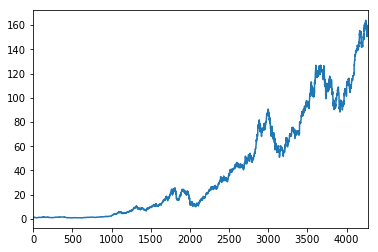

In [54]:
df = pd.read_csv("data\AAPL.csv")
df['Adj Close'].plot()
plt.show()

In [56]:
#two graphs
df[['Close', 'Adj Close']].head(2)

,Close,Adj Close
0,1.535714,1.381615
1,1.437500,1.293256


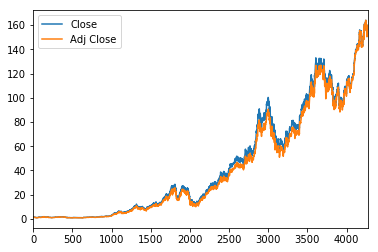

In [57]:
df[['Close', 'Adj Close']].plot()
plt.show()

# Joining pandas

In [57]:
start_date='2010-10-22'
stop_date='2010-10-26'
dates = pd.date_range(start_date, stop_date)
print(dates)
dates[0]

DatetimeIndex(['2010-10-22', '2010-10-23', '2010-10-24', '2010-10-25',
               '2010-10-26'],
              dtype='datetime64[ns]', freq='D')


Timestamp('2010-10-22 00:00:00', freq='D')

In [58]:
df1=pd.DataFrame(index=dates)
df1

""
2010-10-22
2010-10-23
2010-10-24
2010-10-25
2010-10-26


In [59]:
dtSPY=pd.read_csv('data\SPY.csv', index_col="Date", parse_dates=True, 
                  usecols=['Date', 'Adj Close'], na_values=['nan'])
dtSPY = dtSPY.rename(columns={'Adj Close': 'SPY'})
dtSPY.head()

,SPY
Date,
2000-01-28,97.477760
2000-01-31,100.123177
2000-02-01,101.109604
2000-02-02,101.199280
2000-02-03,102.723763


In [60]:
df2=df1.join(dtSPY)
df2.dropna()

,SPY
2010-10-22,102.568977
2010-10-25,102.872299
2010-10-26,102.889610


In [61]:
df1 = df1.join(dtSPY, how='inner')

In [71]:
import os
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    print(symbols)
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol), index_col="Date", 
                     parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close': symbol})
        if symbol == 'SPY':
            df=df.join(df_temp, how='inner')
        else:
            df=df.join(df_temp)

    return df

In [76]:
dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['GOOG','IBM','GLD']
df =get_data(symbols, dates)
df.shape

['SPY', 'GOOG', 'IBM', 'GLD']


(252, 4)

# Slicing pandas

In [78]:
df_row_sliced = df.ix['2010-01-01':'2010-01-31']
df_row_sliced.shape

(19, 4)

In [82]:
#column
df[['GOOG', 'GLD']].shape

(252, 2)

In [84]:
df_sliced = df.ix['2010-03-10':'2010-03-15', ['SPY', 'IBM']]
df_sliced

,SPY,IBM
2010-03-10,98.235222,104.007149
2010-03-11,98.645363,105.646484
2010-03-12,98.653923,105.927994
2010-03-15,98.679543,105.836914


# Plot_Normalize

In [89]:
print(df.ix[0, :])
print(df.head(1))

SPY      96.833946
GOOG    311.349976
IBM     109.173752
GLD     109.800003
Name: 2010-01-04 00:00:00, dtype: float64
                  SPY        GOOG         IBM         GLD
2010-01-04  96.833946  311.349976  109.173752  109.800003


In [111]:
def normalize_data(df):
    return df/df.ix[0]

In [112]:
def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title, fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
#plot_data(df)

Populating the interactive namespace from numpy and matplotlib


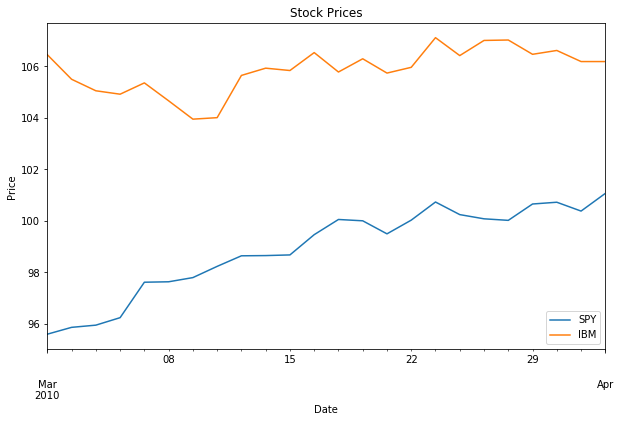

In [113]:
# Notebook setting plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
#
def plot_selected(df, columns, start_index, end_index):
    df = df.ix[start_index:end_index, columns]
    plot_data(df)
plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

['SPY', 'GOOG', 'IBM', 'GLD']


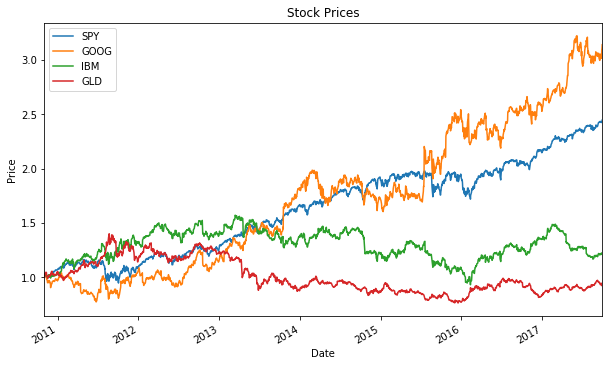

In [116]:
dates_all = pd.date_range('2010-11-01', '2017-09-29')
symbols = ['GOOG','IBM','GLD']
df_all =get_data(symbols, dates_all)
df_norm = normalize_data(df_all)
plot_data(df_norm, title="Stock Prices")

# Pavel Func to import

In [1]:
import os
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
# dates = pd.date_range('2010-01-01', '2010-12-31')
# symbols = ['GOOG','IBM','GLD']
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    print(symbols)
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol), index_col="Date", 
                     parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close': symbol})
        if symbol == 'SPY':
            df=df.join(df_temp, how='inner')
        else:
            df=df.join(df_temp)

    return df
# Notebook setting plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
def normalize_data(df):
    return df/df.ix[0]
def plot_selected(df, columns, start_index, end_index):
    df = df.ix[start_index:end_index, columns]
    plot_data(df)
# plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

Populating the interactive namespace from numpy and matplotlib
